# Data Wrangling WeRateDogs Project 2

## Steps 

- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations


## Code

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# Gathering

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB




__Use Twitter API and Python's Tweepy library and store each tweet's set of JSON data in a file.__

In [6]:
API_KEY = ""
API_SECRET_KEY = ""
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [7]:
df_list = []
error_list = []

start = time.time()

# Will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # user's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_list.append(tweet_id)
        

end = time.time()
print(end - start)

888202515573088257 __ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 __ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 __ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 __ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 __ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 __ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 __ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 __ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 __ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 __ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 __ [{'code': 144, 'message': 'No status found with that ID.'}]
8272282507997429

In [8]:
print("The lengh of the result", len(df_list))
print("The lengh of the errors", len(error_list))

The lengh of the result 2337
The lengh of the errors 19


__- We reached the limit of Twitter APIs 2 times.__

__- We got 2337 tweet_id correctly and 19 errors.__

__- The total time was about 1923 seconds = 32 min.__

In [9]:
# Create DataFrames 'json' and save it in a file
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [10]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,37555,8190,8034969,142012,2017-08-01 16:23:56
1,892177421306343426,32280,6058,8034969,142012,2017-08-01 00:17:27
2,891815181378084864,24316,4008,8034969,142012,2017-07-31 00:18:03
3,891689557279858688,40902,8345,8034969,142012,2017-07-30 15:58:51
4,891327558926688256,39096,9038,8034969,142012,2017-07-29 16:00:24
5,891087950875897856,19664,3002,8034969,142012,2017-07-29 00:08:17
6,890971913173991426,11490,1985,8034969,142012,2017-07-28 16:27:12
7,890729181411237888,63355,18194,8034969,142012,2017-07-28 00:22:40
8,890609185150312448,27029,4120,8034969,142012,2017-07-27 16:25:51
9,890240255349198849,30975,7112,8034969,142012,2017-07-26 15:59:51


## Gathering Summary 

We finished the first step in the data wrangling. We managed to gather data from an existing csv file, downloaded a tsv file and queried Twitter's API using Tweepy. Finally, we imported the data into the Jupyter Notebook.


# Assessing

In [11]:
#Random samples to assess visually
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,None,None,None,None
2082,670815497391357952,NaN,NaN,2015-11-29 04:04:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,None,None,None,None
680,788908386943430656,NaN,NaN,2016-10-20 01:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Lucy. She destroyed not one, but two r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,None,None,None,None
1439,696894894812565505,NaN,NaN,2016-02-09 03:14:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696894894...,9,10,None,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None


__Quality:__
- Source format is bad and can not be read easily.

__Tidiness:__
- Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

__Quality:__
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any operations on them.

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
image_predictions.info()
image_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZ

__Quality:__
- Missing values from images dataset (2075 rows instead of 2356).
- Some tweets have 2 different tweet_id, that is retweets.

In [20]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


__Quality:__
- The numerator and denominator columns have invalid values.

In [22]:
twitter_archive[twitter_archive['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


__Quality:__
- There are invalid names (a, an and less than 3 characters).

In [23]:
#Orignal tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


__Quality:__
- There are retweeted tweets, and we do not want it.

In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
tweet_id           2337 non-null int64
favorites          2337 non-null int64
retweets           2337 non-null int64
user_followers     2337 non-null int64
user_favourites    2337 non-null int64
date_time          2337 non-null object
dtypes: int64(5), object(1)
memory usage: 109.6+ KB


## Assessing Summary

### Quality

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- The numerator and denominator columns have invalid values.
- In several columns null objects are non-null (None to NaN).
- There are invalid names (a, an and less than 3 characters).- We only want original ratings tweets, not retweets.
- We might change the type of columns: (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string since we aren't doing any actions on them.
- Sources are not readable.
- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets have 2 different tweet_id, that are retweets.


### Tidiness

- Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that.
- Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.


# Cleaning

Here we will fix the quality and tidiness issues that we identified in the assess step.

In [65]:
#Copy Dataframes
tweet_data_clean = tweet_data.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean= image_predictions.copy()

__Define__

Merge tweet_info and image_predictions into twitter_archive

__Code__

In [66]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [67]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

__Test__

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 33 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
favorites                     2065 

__Define__

Move doggo, floofer, pupper and puppo columns into one column dog_stage.

__Code__

In [71]:
#Some dogs has multiple stages, will concatenate them.

twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1744
1,,,,puppo,23
2,,,pupper,,211
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [74]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = 'None'

__Test__

In [75]:
twitter_archive_clean.dog_stage.value_counts()

None             1744
pupper            211
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64


__Define__

Delete rows and columns that we will not use them or benefit from them.

__Code__

In [76]:
#Retweets:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#Duplicated tweet_id:
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

#Without pictures:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['jpg_url'])

#Useless columns:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

#Since we have timestamp column, we do not need date_time:
twitter_archive_clean = twitter_archive_clean.drop('date_time', 1)

#Duplicates in dog_stage:
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

__Test__

In [77]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [78]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None             1684
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64
1990



__Define__

Delete image prediction columns


__Code__

In [79]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(prediction_func, axis=1)
twitter_archive_clean['prediction'] = predictions
twitter_archive_clean['confidence_level'] = confidence_level



# Delete columns
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                    'user_favourites'], 1)

__Test__

In [80]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'user_followers',
 'jpg_url',
 'dog_stage',
 'prediction',
 'confidence_level']


__Define__

Make 'source' column clean and readable.

__Code__

In [81]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

__Test__

In [82]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,37555,8190,8034969,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1380,683857920510050305,2016-01-04 03:50:08 +0000,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10,10,Sadie,,,,,3934,1175,8034985,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
1379,684097758874210310,2016-01-04 19:43:10 +0000,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,,,,,4260,1513,8034985,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
1378,684122891630342144,2016-01-04 21:23:02 +0000,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11,10,None,,,,,2067,498,8034985,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000
1377,684177701129875456,2016-01-05 01:00:50 +0000,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,,,,,2084,707,8034985,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,None,chow,0.334783
1376,684188786104872960,2016-01-05 01:44:52 +0000,Twitter for iPhone,"""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,10,10,None,,,,,3606,1239,8034985,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,None,kelpie,0.537782
1375,684195085588783105,2016-01-05 02:09:54 +0000,Twitter for iPhone,This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,,,,,1984,546,8034985,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,None,Chihuahua,0.379365
1374,684200372118904832,2016-01-05 02:30:55 +0000,Twitter for iPhone,Gang of fearless hoofed puppers here. Straight...,https://twitter.com/dog_rates/status/684200372...,6,10,None,,,,,2241,1077,8034985,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,None,NaN,0.000000
1373,684222868335505415,2016-01-05 04:00:18 +0000,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,,,,,3964,1447,8034985,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,None,soft-coated_wheaten_terrier,0.791182
1372,684225744407494656,2016-01-05 04:11:44 +0000,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,,,,,1280,222,8034985,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,None,golden_retriever,0.203249



__Define__

Fix rating numerator and denominators that are not ratings


__Code__

In [83]:
tmp_rating = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = twitter_archive_clean.text == i
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    twitter_archive_clean.loc[x, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_clean.loc[x, column_2] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


__Test__

In [84]:
twitter_archive_clean[twitter_archive_clean.text.isin(tmp_rating)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1398,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,,,,,38226,17572,8034985,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207
1288,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,,,,,2246,789,8034985,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
1277,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,,,,,1945,473,8034986,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
1519,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,,,,,1684,555,8034985,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,None,Blenheim_spaniel,0.924127
1553,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,,,,,2325,1071,8035000,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,None,Chihuahua,0.376741
1010,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,,,,,3127,748,8034985,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,None,collie,0.176758
1132,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,,,,,1984,404,8034985,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842
1227,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,,,,,2116,652,8034985,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
1222,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,,,,,1658,631,8034985,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,NaN,0.000000
1262,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,,,,,2467,589,8034985,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232


__Define__

Clean decimal values in rating numerators.

__Code__

In [85]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1444,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,,,,1778,510,8034985,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
551,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,,19213,6582,8034970,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,,44576,9577,8034969,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
607,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,,6885,1738,8034970,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [86]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1380,10,10
1379,10,10
1378,11,10
1377,10,10
1376,10,10
1375,9,10
1374,6,10
1373,121,110
1372,143,130


In [87]:
twitter_archive_clean['rating_numerator'] = ratings[0]

__Test__

In [88]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
1444,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,,,1778,510,8034985,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
551,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,,19213,6582,8034970,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,,44576,9577,8034969,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
607,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,,6885,1738,8034970,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718



__Define__

Convert the null values to None type


__Code__

In [89]:
twitter_archive_clean.loc[twitter_archive_clean['prediction'] == 'NaN', 'prediction'] = None
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

__Test__

In [90]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 323
Data columns (total 19 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null object
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null object
rating_denominator    1990 non-null int64
name                  1990 non-null object
doggo                 1990 non-null object
floofer               1990 non-null object
pupper                1990 non-null object
puppo                 1990 non-null object
favorites             1990 non-null int64
retweets              1990 non-null int64
user_followers        1990 non-null int64
jpg_url               1990 non-null object
dog_stage             1990 non-null object
prediction            1682 non-null object
confidence_level      1990 non-null float64
dtypes: float64(1), int64(5), object(13)
memory usage: 310.9+ KB



__Define__

Change datatypes .

__Code__

In [91]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['favorites'] = twitter_archive_clean['favorites'].astype(int)
twitter_archive_clean['retweets'] = twitter_archive_clean['retweets'].astype(int)
twitter_archive_clean['user_followers'] = twitter_archive_clean['user_followers'].astype(int)
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

__Test__

In [92]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
favorites                      int64
retweets                       int64
user_followers                 int64
jpg_url                       object
dog_stage                   category
prediction                    object
confidence_level             float64
dtype: object

__Store__

In [93]:
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 19 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null object
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
name                  1990 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorites             1990 non-null int64
retweets              1990 non-null int64
user_followers        1990 non-null int64
jpg_url               1990 non-null object
dog_stage             1990 non-null object
prediction            1682 non-null object
confidence_level      1990 non-null float64
dtypes: float64(3), int64(4), object(12)
memory usage: 295.5+ KB


__Data has been successfully stored in *twitter_archive_master.csv*__

# Analyzing & Visualizing Data

In [94]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 19 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null object
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
name                  1990 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorites             1990 non-null int64
retweets              1990 non-null int64
user_followers        1990 non-null int64
jpg_url               1990 non-null object
dog_stage             1990 non-null object
prediction            1682 non-null object
confidence_level      1990 non-null float64
dtypes: float64(3), int64(4), object(12)
memory usage: 295.5+ KB


In [95]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,37555,8190,8034969,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,683857920510050305,2016-01-04 03:50:08,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10.0,10.0,Sadie,NaN,NaN,NaN,NaN,3934,1175,8034985,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
2,684097758874210310,2016-01-04 19:43:10,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10.0,10.0,Lupe,NaN,NaN,NaN,NaN,4260,1513,8034985,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
3,684122891630342144,2016-01-04 21:23:02,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,NaN,NaN,NaN,NaN,2067,498,8034985,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000
4,684177701129875456,2016-01-05 01:00:50,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,10.0,10.0,Kulet,NaN,NaN,NaN,NaN,2084,707,8034985,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,None,chow,0.334783


In [96]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1990 entries, 2017-08-01 16:23:56 to 2017-01-21 18:26:02
Data columns (total 18 columns):
tweet_id              1990 non-null object
source                1990 non-null category
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
name                  1990 non-null object
doggo                 74 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorites             1990 non-null int64
retweets              1990 non-null int64
user_followers        1990 non-null int64
jpg_url               1990 non-null object
dog_stage             1990 non-null category
prediction            1682 non-null object
confidence_level      1990 non-null float64
dtypes: category(2), float64(3), int64(3), object(10)
memory usage: 268.7+ KB


In [97]:
df.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1990.000000,1990.000000,1990.000000,1990.000000,1.990000e+03,1990.000000
mean,12.237578,10.511055,8597.158291,2606.558291,8.034987e+06,0.464142
std,41.512839,7.268784,12623.600852,4658.114203,5.549845e+01,0.339202
min,0.000000,7.000000,76.000000,11.000000,8.034969e+06,0.000000
25%,10.000000,10.000000,1849.000000,582.250000,8.034970e+06,0.140228
50%,11.000000,10.000000,3886.000000,1251.000000,8.034985e+06,0.457514
75%,12.000000,10.000000,10719.000000,2967.000000,8.034985e+06,0.775646
max,1776.000000,170.000000,162165.000000,82485.000000,8.035620e+06,0.999956


## What is the most common dog?

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


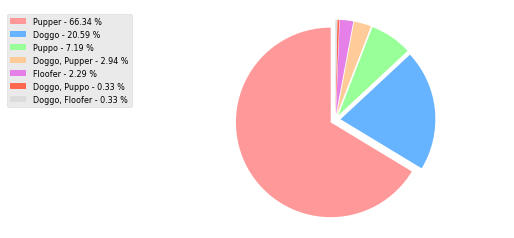

In [122]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 


plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

- Pupper is the most common owned dog.

## What is the most common rating?

In [99]:
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

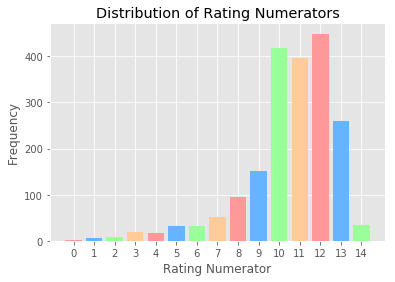

In [100]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

- Most tweets are given a rating between 10 to 13.

## What is the relation between Retweets & Likes?

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


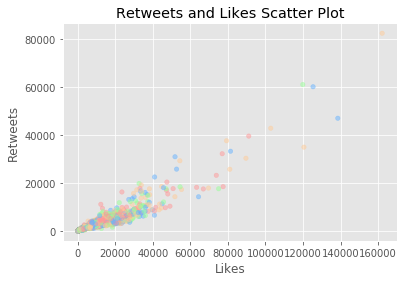

In [101]:
#Retweets vs. Likes

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5, colors = colors)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

- Retweets are positively correlated with Likes.